## Prepare X_train, X_val, y_train, y_val

In [1]:
import LoadAndPreprocessDataset

In [2]:
#Load filenames
train,val,test = LoadAndPreprocessDataset.loadDatasetFilenames()

#Load TRAIN files
X,y_train=LoadAndPreprocessDataset.loadBatch(train,batch_size=1000)
#Preprocess TRAIN
X_train=LoadAndPreprocessDataset.MFCC_DELTA(X,n_mfcc=40)
#X_train=LoadAndPreprocessDataset.MFCC(X,n_mfcc=40)
#Release memory
del(X)

#Load VAL files
X,y_val=LoadAndPreprocessDataset.loadBatch(val,batch_size=100)
#Preprocess VAL
X_val=LoadAndPreprocessDataset.MFCC_DELTA(X,n_mfcc=40)
#X_val=LoadAndPreprocessDataset.MFCC(X,n_mfcc=40)
#Release memory
del(X)

print(X_train.shape,X_val.shape)

# NORMALIZATION
### NO normalization seems better
#from sklearn.preprocessing import normalize
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range=(-1,1)) # Gives huge bias
#for i in range(len(X_train)):
    #X_train[i]=normalize(X_train[i], axis=0, norm='max') #normalize each feature of the example
    #X_train[i]=(X_train[i] - X_train[i].min(0)) / X_train[i].ptp(0) # HUGE BIAS
    #X_train[i]=scaler.fit_transform(X_train[i]) # HUGE BIAS
#for i in range(len(X_val)):
    #X_val[i]=normalize(X_val[i], axis=0, norm='max') #normalize each feature of the example
    #X_val[i]=(X_val[i] - X_val[i].min(0)) / X_val[i].ptp(0) #HUGE BIAS
    #X_val[i]=scaler.fit_transform(X_val[i])  # HUGE BIAS




(1000, 120, 126) (100, 120, 126)


(1000, 120, 126)
(1000,)
(100, 120, 126)
(100,)


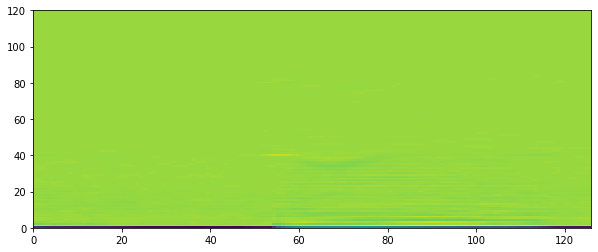

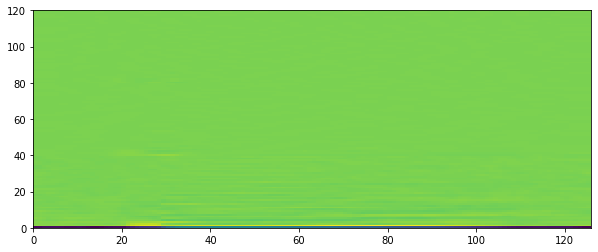

-715.541748046875
142.26123046875
0 -431.6432800292969 -138.67361450195312
1 -22.037553787231445 84.91767883300781
2 -18.85608673095703 45.47434997558594
3 -13.445694923400879 47.8572998046875
4 -42.84281921386719 14.809528350830078
5 -9.293952941894531 19.05844497680664
6 -18.497411727905273 18.459606170654297
7 -14.56323528289795 13.328508377075195
8 -14.599525451660156 11.797721862792969
9 -17.945045471191406 11.309388160705566
10 -10.344827651977539 5.551471710205078
11 -16.119003295898438 5.91731071472168
12 -14.613539695739746 7.0967793464660645
13 -3.731995105743408 19.39735984802246
14 -21.649951934814453 1.1907354593276978
15 -9.471946716308594 9.477495193481445
16 -5.677689075469971 8.155208587646484
17 -13.901192665100098 4.410592079162598
18 -6.148566246032715 6.778397560119629
19 -4.7564921379089355 5.744936466217041
20 -7.577354431152344 3.7704501152038574
21 -6.58377742767334 5.938966751098633
22 -5.62819766998291 7.903606414794922
23 -7.2107720375061035 3.22641634941101

In [3]:
# Look at some data

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.pcolormesh(X_train[0])
plt.show()

plt.figure(figsize=(10, 4))
plt.pcolormesh(X_val[0])
plt.show()

import numpy as np
print(np.min(X_train))
print(np.max(X_train))

for i in range(len(X_train[1])):
    print(i,np.min(X_train[1,i]),np.max(X_train[1,i]))
print(X_train[1].shape)

## Define NN

In [4]:
import Models

In [6]:
categories=['yes','no','up','down','left','right','on','off','stop','go']
nCategories=len(categories)


#ADD extra dimension for CNN
import numpy as np
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]
print(X_train.shape,X_val.shape)



modelName="simpleCNN-elu"
model = Models.SimpleCNN(nCategories,
                        inputShape=X_train.shape[1:],
                        name=modelName)



model.compile(optimizer='Nadam',
              loss=['sparse_categorical_crossentropy'],
              metrics=['sparse_categorical_accuracy'])

model.summary()

(1000, 120, 126, 1) (100, 120, 126, 1)


ValueError: Negative dimension size caused by subtracting 32 from 3 for 'max_pooling2d_1/MaxPool' (op: 'MaxPool') with input shapes: [?,3,3,16].

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, TensorBoard
import math
import datetime

log_dir = "logs/fit/" +modelName+"-"+ datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 15.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)

def performance_scheduling(epoch):
    #.....
    return lrate

my_callbacks = [
    EarlyStopping(monitor='val_sparse_categorical_accuracy',
                  patience=15,
                  verbose=1,
                  restore_best_weights=True),
    ModelCheckpoint('models/'+modelName+'.h5',
                    monitor='val_sparse_categorical_accuracy',
                    verbose=1,
                    save_best_only=True)]#,
    #lrate]


In [ ]:
#Train
results = model.fit(x=X_train,
                    y=y_train,
                    validation_data=(X_val,y_val),
                    batch_size=32, # usually between 10 and 32
                    epochs=60,
                    callbacks=my_callbacks,
                    verbose=1)

#model.save('models/'+modelName+'.h5')

In [ ]:
import matplotlib.pyplot as plt

import datetime
save_dir="output/"+modelName+"-"+ datetime.datetime.now().strftime("%Y-%m-%d_%H-%M")+"_"

# summarize history for categorical accuracy
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('Categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig(save_dir+"Categorical Accuracy", dpi=400)
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig(save_dir+"Loss", dpi=400)
plt.show()



## Test the model

In [ ]:
#Load TEST files
X,y_test=LoadAndPreprocessDataset.loadBatch(val,batch_size=1000)
#Preprocess TEST
X_test=LoadAndPreprocessDataset.MFCC_DELTA(X,n_mfcc=40)
#X_test=LoadAndPreprocessDataset.MFCC(X,n_mfcc=40)
#Release memory
del(X)

#ADD extra dimension for CNN
import numpy as np
X_test = X_test[..., np.newaxis]

In [ ]:
#load best model
from tensorflow.keras.models import load_model
model = load_model('models/'+modelName+'.h5')

# Test the model on test data
import numpy as np
score = model.evaluate(X_test, y_test)
y_pred=np.argmax(model.predict(X_test),1)


#Measure time for every single prediction
"""import time

s=time.time()
y_pred=np.argmax(model.predict(X_test[:500,:,:]),1)
e=time.time()
print("Entire:",e-s)

starts=np.empty((len(X_test),))
ends=np.empty((len(X_test),))
for i in range(len(X_test)):
    a=np.array([X_test[i]])
    starts[i]=time.time()
    a=np.argmax(model.predict(a),1)
    ends[i]=time.time()
average=sum(ends-starts)/len(X_test)
print("Average single prediction time (s):",average)"""

# 1 prediction or a batch of 10 requires the same amount of time
# a batch of 100 prediction requires the double of 1
# a batch of 500 prediction requires the 3 times of 1

## Metrics Summary

In [ ]:
train_loss=results.history.get('loss')[-1]
val_loss=results.history.get('val_loss')[-1]

train_error=1-results.history.get('sparse_categorical_accuracy')[-1]
val_error=1-results.history.get('val_sparse_categorical_accuracy')[-1]

test_loss=score[0]
test_error=1-score[1]

print('Train loss:\t', train_loss)
print('Train accuracy:\t', 1-train_error)
print('Val loss:\t', val_loss)
print('Val accuracy:\t', 1-val_error)
print('Test loss:\t', test_loss)
print('Test accuracy:\t', score[1])

optimal_error=0.01 #human error

bias=train_error-optimal_error
variance=val_error-train_error
print("Bias:\t\t",bias)
print("Variance:\t",variance)


# Precision and Recall(sensitivity/true positive rate)
from sklearn.metrics import precision_score, recall_score
prec=precision_score(y_test, y_pred,average='micro')
rec=recall_score(y_test, y_pred,average='micro')

#F1 - high if both recall and precision are high.
from sklearn.metrics import f1_score
f1=f1_score(y_test, y_pred,average='micro')

print("Precision:\t",prec)
print("Recall:\t\t",rec)
print("F1:\t\t",f1)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import audioUtils
audioUtils.plot_confusion_matrix(cm,categories, normalize=False,save_path=save_dir)



# SAVE MODEL SUMMARY and METRICS TO FILE
f = open(save_dir+"Metrics.txt", "a")
f.write(model.summary()+"\n\n")
f.write('Train loss:\t'+ str(train_loss)+ "\n")
f.write('Train accuracy:\t'+ str((1-train_error))+ "\n")
f.write('Val loss:\t'+ str(val_loss)+ "\n")
f.write('Val accuracy:\t'+ str((1-val_error))+ "\n")
f.write('Test loss:\t'+ str(test_loss)+ "\n")
f.write('Test accuracy:\t'+ str(score[1])+ "\n")
f.write("Bias:\t\t"+str(bias)+ "\n")
f.write("Variance:\t"+str(variance)+ "\n")
f.write("Precision:\t"+str(prec)+ "\n")
f.write("Recall:\t\t"+str(rec)+ "\n")
f.write("F1:\t\t"+str(f1))
f.close()

In [ ]:
#ROC FOR MULTICLASS?????
"""
#ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--") # dashed diagonal
    # Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.show()

#AUC Score
#perfect classifier=1, purely random=0.5.
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)"""